<a href="https://colab.research.google.com/github/RAMA-PRAJAPATI/MLPROJECTS/blob/main/Hidden_Themes_in_BBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title – Discovering Hidden Themes in BBC News Articles Using Topic Modeling**

### **Dataset Summary**

This project works with a well-known compilation of BBC news stories. Each article is pre-classified into one of five editorial sections commonly found in news media:

* **Business**
* **Entertainment**
* **Politics**
* **Sports**
* **Technology**

The dataset is usually arranged as individual text files or a structured table that includes:

* **Article Content (text):** The full body of the news story
* **Category Label (tag):** The predefined section to which the article belongs

This setup allows us to explore real-world news data from multiple domains.

---

## **Project Aim and Workflow**

### **1. Integrating the Dataset**

All articles from the five categories will be merged into a single, comprehensive dataframe.
Each row of this dataframe will represent **one independent document**, making it suitable for text-processing tasks.

### **2. Extracting Themes Through Topic Modeling**

To identify underlying patterns in the news articles, the project will use **unsupervised learning techniques**, particularly:

* **Latent Dirichlet Allocation (LDA)** – a probabilistic model that discovers a set of topics based on word distribution
* **Latent Semantic Analysis (LSA)** – a matrix-decomposition method that uncovers semantic structure in text

These methods help reveal hidden themes that may not be immediately obvious.

### **3. Assessing Topic–Label Consistency**

Once the topics are extracted, the next step is to evaluate how closely these discovered topics align with the original news categories.
This comparison will be carried out using:

* **Topic Coherence Score** – to determine how meaningful and interpretable the topics are
* **Confusion Matrix** – to compare predicted vs. original categories
* **Accuracy or Similarity Metrics** – to quantify how well the model captures the labelled structure

This step helps validate whether the unsupervised topics reflect the natural divisions found in the BBC dataset.

---

## **Additional Enhancements Added**

To make the project more robust and unique, you can also include:

### 🔹 **Data Pre-processing Pipeline**

* Tokenization
* Stopword removal
* Lemmatization
* TF-IDF or Bag-of-Words vectorization

### 🔹 **Visualization**

* Word clouds for each topic
* Topic distribution graphs
* Intertopic distance maps (via pyLDAvis)

### 🔹 **Discussion and Insights**

* Whether topic modeling correctly captures the essence of each news section
* Cases where topics overlap or become ambiguous
* Recommendations to improve topic stability



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pandas as pd

# Directories containing BBC article categories
directories = [
    "/content/drive/MyDrive/business",
    "/content/drive/MyDrive/entertainment",
    "/content/drive/MyDrive/politics",
    "/content/drive/MyDrive/sport",
    "/content/drive/MyDrive/tech"
]

all_texts = []
all_labels = []

# Loop through each category folder and extract text files
for path in directories:
    category = os.path.basename(path)   # Use folder name as label

    for filename in os.listdir(path):
        if filename.lower().endswith(".txt"):
            file_path = os.path.join(path, filename)

            with open(file_path, "r", encoding="latin-1") as f:
                all_texts.append(f.read())
                all_labels.append(category)

# Create a DataFrame containing all the documents and their labels
df = pd.DataFrame({
    "text": all_texts,
    "tag": all_labels
})

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                text       tag
0  Peugeot deal boosts Mitsubishi\n\nStruggling J...  business
1  Ask Jeeves tips online ad revival\n\nAsk Jeeve...  business
2  India widens access to telecoms\n\nIndia has r...  business
3  Dollar gains on Greenspan speech\n\nThe dollar...  business
4  Yukos loses US bankruptcy battle\n\nA judge ha...  business


In [ ]:

df.tail()

,text,tag
2220,Hotspot users gain free net calls\n\nPeople us...,tech
2221,Software watching while you work\n\nSoftware t...,tech
2222,PlayStation 3 processor unveiled\n\nThe Cell p...,tech
2223,Have hackers recruited your PC?\n\nMore than o...,tech
2224,"Cebit opens to mobile music tune\n\nCebit, the...",tech


In [ ]:
df.shape

(2225, 2)

In [ ]:
#text processing
import re
import nltk
from nltk.corpus import stopwords

# Download the stopword list
nltk.download("stopwords")

# Create a stopword set for faster lookup
stop_words = set(stopwords.words("english"))

# Text cleaning function
def clean_document(doc):
    doc = doc.lower()                                # convert to lowercase
    doc = re.sub(r"[^a-z\s]", "", doc)               # keep only alphabets and spaces
    words = doc.split()
    filtered = [w for w in words if w not in stop_words and len(w) > 2]
    return " ".join(filtered)

# Apply cleaning to the dataframe
df["clean_text"] = df["text"].apply(clean_document)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head(20)

,text,tag,clean_text
0,Peugeot deal boosts Mitsubishi\n\nStruggling J...,business,peugeot deal boosts mitsubishi struggling japa...
1,Ask Jeeves tips online ad revival\n\nAsk Jeeve...,business,ask jeeves tips online revival ask jeeves beco...
2,India widens access to telecoms\n\nIndia has r...,business,india widens access telecoms india raised limi...
3,Dollar gains on Greenspan speech\n\nThe dollar...,business,dollar gains greenspan speech dollar hit highe...
4,Yukos loses US bankruptcy battle\n\nA judge ha...,business,yukos loses bankruptcy battle judge dismissed ...
5,Mixed signals from French economy\n\nThe Frenc...,business,mixed signals french economy french economy pi...
6,Telegraph newspapers axe 90 jobs\n\nThe Daily ...,business,telegraph newspapers axe jobs daily sunday tel...
7,China keeps tight rein on credit\n\nChina's ef...,business,china keeps tight rein credit chinas efforts s...
8,Court rejects $280bn tobacco case\n\nA US gove...,business,court rejects tobacco case government claim ac...
9,High fuel prices hit BA's profits\n\nBritish A...,business,high fuel prices hit bas profits british airwa...


In [ ]:
df = df.dropna(subset=['text'])
df = df[df['text'].str.strip() != ""]
df.head()

,text,tag,clean_text
0,Peugeot deal boosts Mitsubishi\n\nStruggling J...,business,peugeot deal boosts mitsubishi struggling japa...
1,Ask Jeeves tips online ad revival\n\nAsk Jeeve...,business,ask jeeves tips online revival ask jeeves beco...
2,India widens access to telecoms\n\nIndia has r...,business,india widens access telecoms india raised limi...
3,Dollar gains on Greenspan speech\n\nThe dollar...,business,dollar gains greenspan speech dollar hit highe...
4,Yukos loses US bankruptcy battle\n\nA judge ha...,business,yukos loses bankruptcy battle judge dismissed ...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with basic filtering rules
cv = CountVectorizer(
    max_df=0.95,          # ignore words appearing in 95%+ documents
    min_df=2,             # include words appearing in at least 2 documents
    stop_words="english"  # remove English stopwords
)

# Convert cleaned text into a document–term matrix
X = cv.fit_transform(df["clean_text"])


max_df=0.95

Ignore words that appear in 95% or more of all documents

These words are usually not useful because they occur everywhere

Example: “said”, “news”

🔹 min_df=2

Ignore words that appear in less than 2 documents

These are extremely rare words, spell mistakes, names, etc.

Removing them helps improve topic modeling quality

🔹 stop_words="english"

Remove all English stopwords

Example: "the", "is", "and", "of", "this"

These words do not contribute meaningfully to topics

So this configuration is cleaning the text before transformin

| Document | business | market | player | film | government |
| -------- | -------- | ------ | ------ | ---- | ---------- |
| Doc 1    | 5        | 2      | 0      | 0    | 0          |
| Doc 2    | 0        | 0      | 3      | 0    | 2          |
| Doc 3    | 0        | 0      | 0      | 4    | 0          |


In [ ]:
# Display the first 20 terms learned by the vectorizer
feature_names = cv.get_feature_names_out()
print(feature_names[:20])


['aaa' 'aaas' 'aac' 'aaron' 'abacus' 'abandon' 'abandoned' 'abandoning'
 'abandonment' 'abating' 'abba' 'abbas' 'abbasi' 'abbey' 'abbott' 'abc'
 'abdellatif' 'abdication' 'abdominal' 'abdullah']


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize the LDA model
lda_model = LatentDirichletAllocation(
    n_components=5,      # number of topics to extract
    random_state=42
)

# Train the model on the document–term matrix
lda_model.fit(X)

# Retrieve vocabulary terms
vocab = cv.get_feature_names_out()

# Display the top 10 words for each topic
for topic_id, topic_weights in enumerate(lda_model.components_):
    top_indices = topic_weights.argsort()[-10:]   # indices of top 10 words
    top_words = [vocab[i] for i in top_indices]
    print(f"Topic {topic_id}: {top_words}")


Topic 0: ['digital', 'market', 'users', 'music', 'year', 'mobile', 'technology', 'new', 'people', 'said']
Topic 1: ['year', 'number', 'award', 'new', 'awards', 'years', 'music', 'said', 'best', 'film']
Topic 2: ['players', 'brown', 'time', 'wales', 'new', 'labour', 'election', 'england', 'game', 'said']
Topic 3: ['say', 'year', 'plans', 'minister', 'public', 'told', 'new', 'people', 'government', 'said']
Topic 4: ['time', 'win', 'company', 'years', 'open', 'set', 'oil', 'world', 'year', 'said']


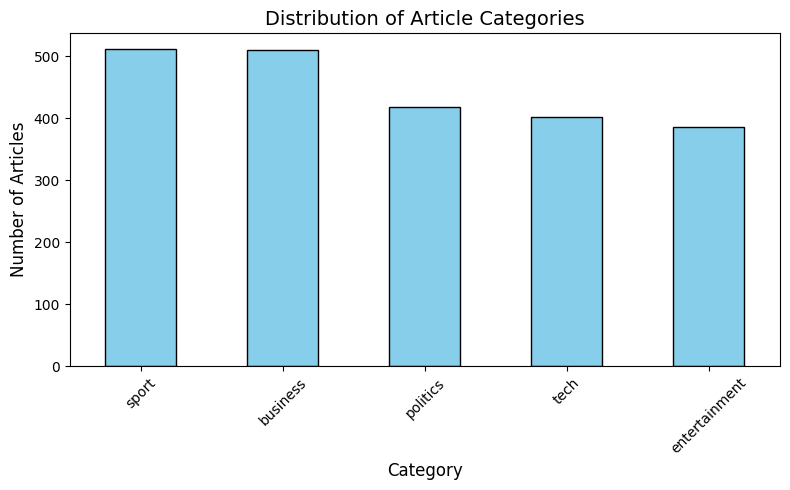

In [ ]:
# Chart 1 – Visualizing class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
class_counts = df['tag'].value_counts()

class_counts.plot(
    kind='bar',
    color='skyblue',
    edgecolor='black'
)

plt.title("Distribution of Article Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


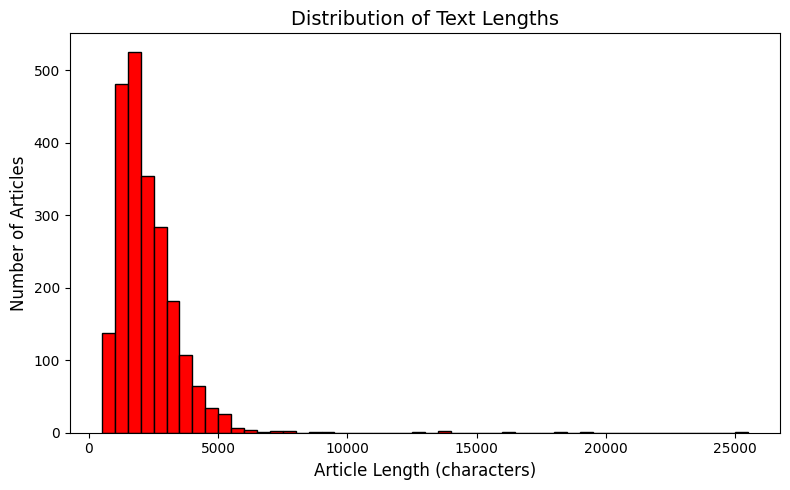

In [ ]:
# Chart 2 – Distribution of text lengths
df['text_length'] = df['text'].astype(str).apply(len)

plt.figure(figsize=(8, 5))
plt.hist(df['text_length'], bins=50, color='red', edgecolor='black')

plt.title("Distribution of Text Lengths", fontsize=14)
plt.xlabel("Article Length (characters)", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)

plt.tight_layout()
plt.show()


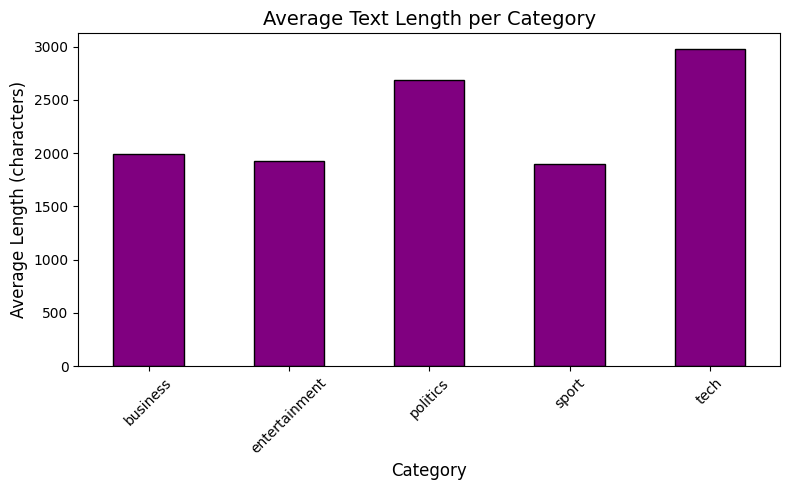

In [ ]:
# Chart 3 – Average text length for each category
plt.figure(figsize=(8, 5))

avg_lengths = df.groupby('tag')['text_length'].mean()

avg_lengths.plot(
    kind='bar',
    color='purple',
    edgecolor='black'
)

plt.title("Average Text Length per Category", fontsize=14)
plt.ylabel("Average Length (characters)", fontsize=12)
plt.xlabel("Category", fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


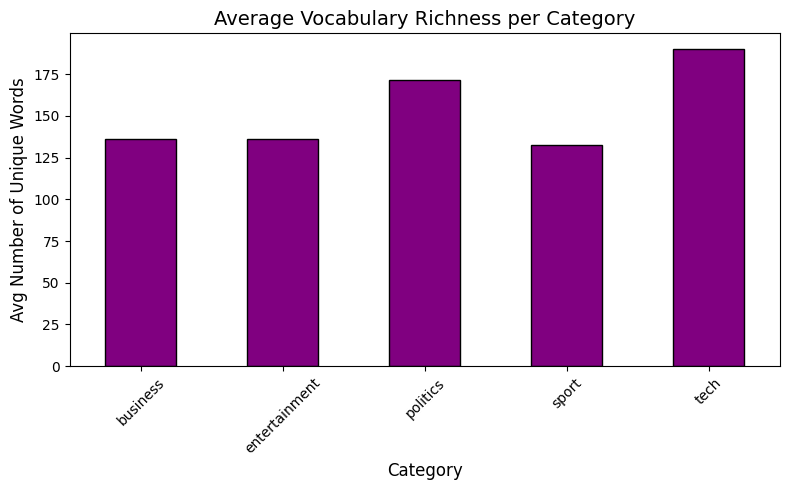

In [ ]:
# Unique word count per category
df['unique_words'] = df['clean_text'].apply(lambda x: len(set(x.split())))

plt.figure(figsize=(8,5))
df.groupby('tag')['unique_words'].mean().plot(kind='bar', color='purple', edgecolor='black')

plt.title("Average Vocabulary Richness per Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Avg Number of Unique Words", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


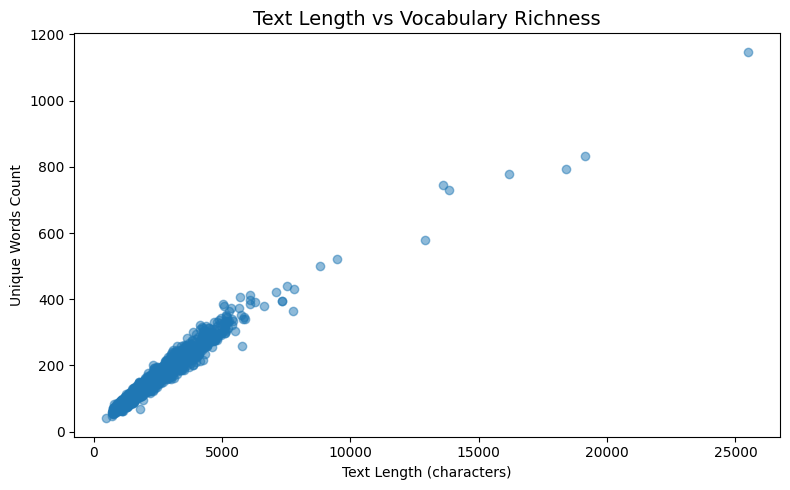

In [ ]:
# Scatter plot: text length vs unique words
plt.figure(figsize=(8,5))
plt.scatter(df['text_length'], df['unique_words'], alpha=0.5)

plt.title("Text Length vs Vocabulary Richness", fontsize=14)
plt.xlabel("Text Length (characters)")
plt.ylabel("Unique Words Count")
plt.tight_layout()
plt.show()


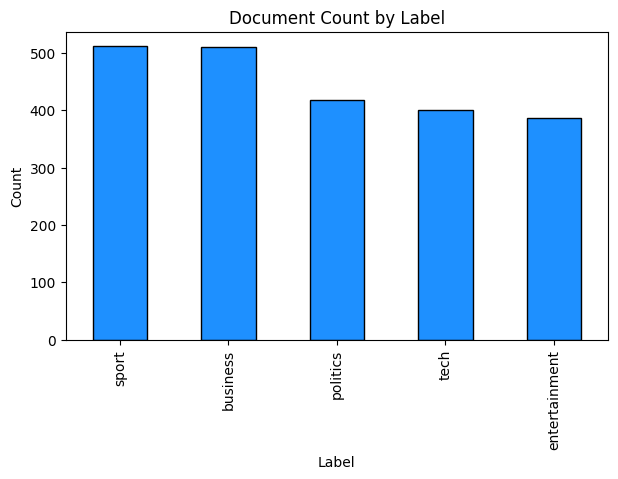

In [ ]:
#chart 4
plt.figure(figsize=(7,4))
df['tag'].value_counts().plot(kind='bar', color='dodgerblue', edgecolor='k')
plt.title("Document Count by Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

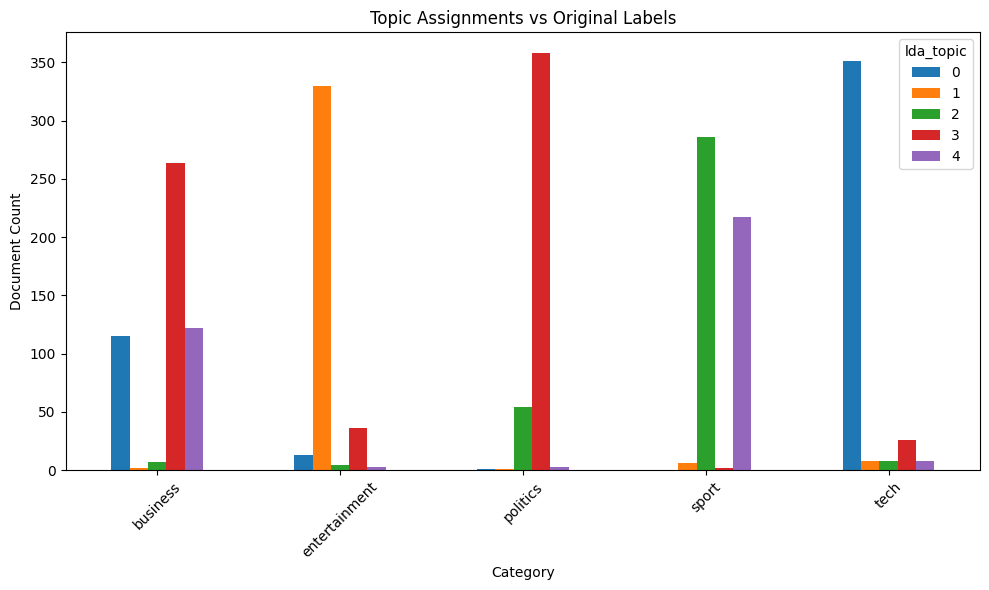

In [ ]:
# Predict topic for each document
topic_assignments = lda_model.transform(X).argmax(axis=1)
df['lda_topic'] = topic_assignments

# Cross-tab between category and topic
pd.crosstab(df['tag'], df['lda_topic'])
pd.crosstab(df['tag'], df['lda_topic']).plot(kind='bar', figsize=(10,6))
plt.title("Topic Assignments vs Original Labels")
plt.xlabel("Category")
plt.ylabel("Document Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



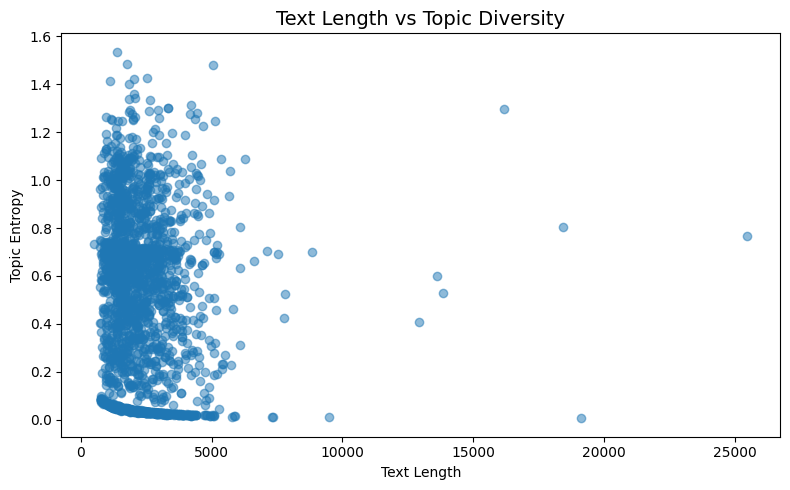

In [ ]:
# Correlation Between Text Length & Number of Topics
import numpy as np

topic_probs = lda_model.transform(X)
df['topic_entropy'] = -np.sum(topic_probs * np.log(topic_probs + 1e-10), axis=1)

plt.figure(figsize=(8,5))
plt.scatter(df['text_length'], df['topic_entropy'], alpha=0.5)

plt.title("Text Length vs Topic Diversity", fontsize=14)
plt.xlabel("Text Length")
plt.ylabel("Topic Entropy")
plt.tight_layout()
plt.show()

Vocabulary size: 2000
Total word occurrences in corpus: 275310


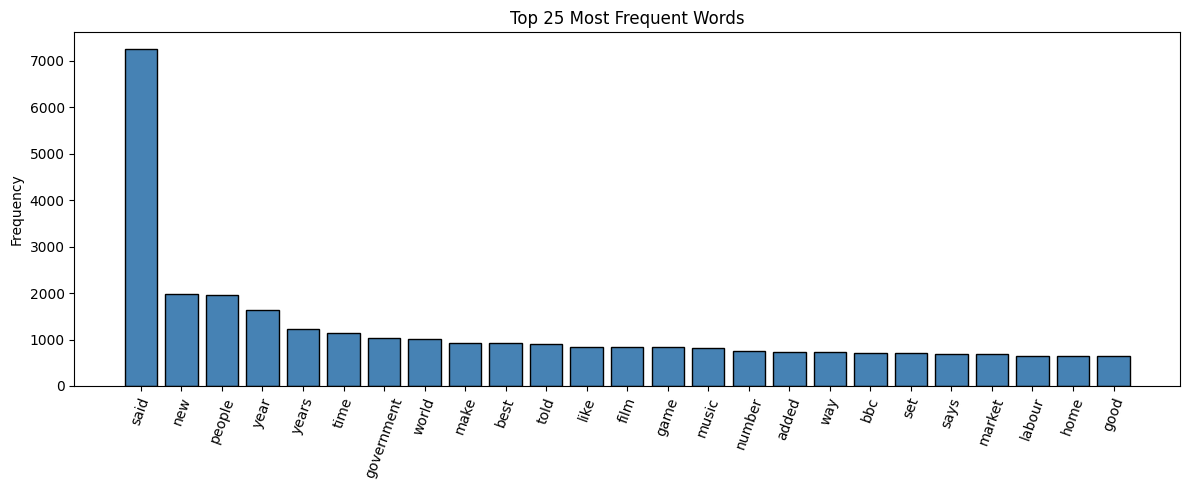


Top 25 Words (text list):
said: 7253
new: 1970
people: 1969
year: 1637
years: 1223
time: 1147
government: 1023
world: 1003
make: 927
best: 926
told: 911
like: 838
film: 834
game: 833
music: 828
number: 760
added: 731
way: 726
bbc: 717
set: 714
says: 688
market: 681
labour: 652
home: 647
good: 642


In [ ]:
# Attempt importing CountVectorizer
try:
    from sklearn.feature_extraction.text import CountVectorizer
    cv_available = True
except Exception as err:
    print("Error loading CountVectorizer:", type(err).__name__, err)
    cv_available = False


# If import failed, notify user
if not cv_available:
    print("Please install scikit-learn: pip install scikit-learn")
else:
    # Initialize vectorizer
    vectorizer = CountVectorizer(
        max_features=2000,
        stop_words="english"
    )

    X = vectorizer.fit_transform(df["clean_text"])
    frequencies = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()

    print("Vocabulary size:", len(vocab))
    print("Total word occurrences in corpus:", int(frequencies.sum()))

    # Check if vocabulary or counts are empty
    if len(vocab) == 0 or frequencies.sum() == 0:
        print("\nVectorizer returned empty results — using fallback word counter.")

        from collections import Counter
        all_words = " ".join(df["clean_text"]).split()
        counter = Counter([w for w in all_words if len(w) > 2])

        top = counter.most_common(25)
        print("\nTop 25 words (fallback):")
        for word, count in top:
            print(f"{word}: {count}")

    else:
        # Identify top 25 words
        top_n = 25
        top_indices = np.argsort(frequencies)[::-1][:top_n]
        top_words = [vocab[i] for i in top_indices]
        top_counts = frequencies[top_indices]

        # If all counts are zero, print list instead of plotting
        if top_counts.sum() == 0:
            print("All word frequencies are zero — showing vocabulary instead:")
            print(top_words)

        else:
            plt.figure(figsize=(12, 5))
            plt.bar(top_words, top_counts, color="steelblue", edgecolor="black")
            plt.xticks(rotation=70)
            plt.title("Top 25 Most Frequent Words")
            plt.ylabel("Frequency")
            plt.tight_layout()
            plt.show()

            print("\nTop 25 Words (text list):")
            for w, c in zip(top_words, top_counts):
                print(f"{w}: {int(c)}")


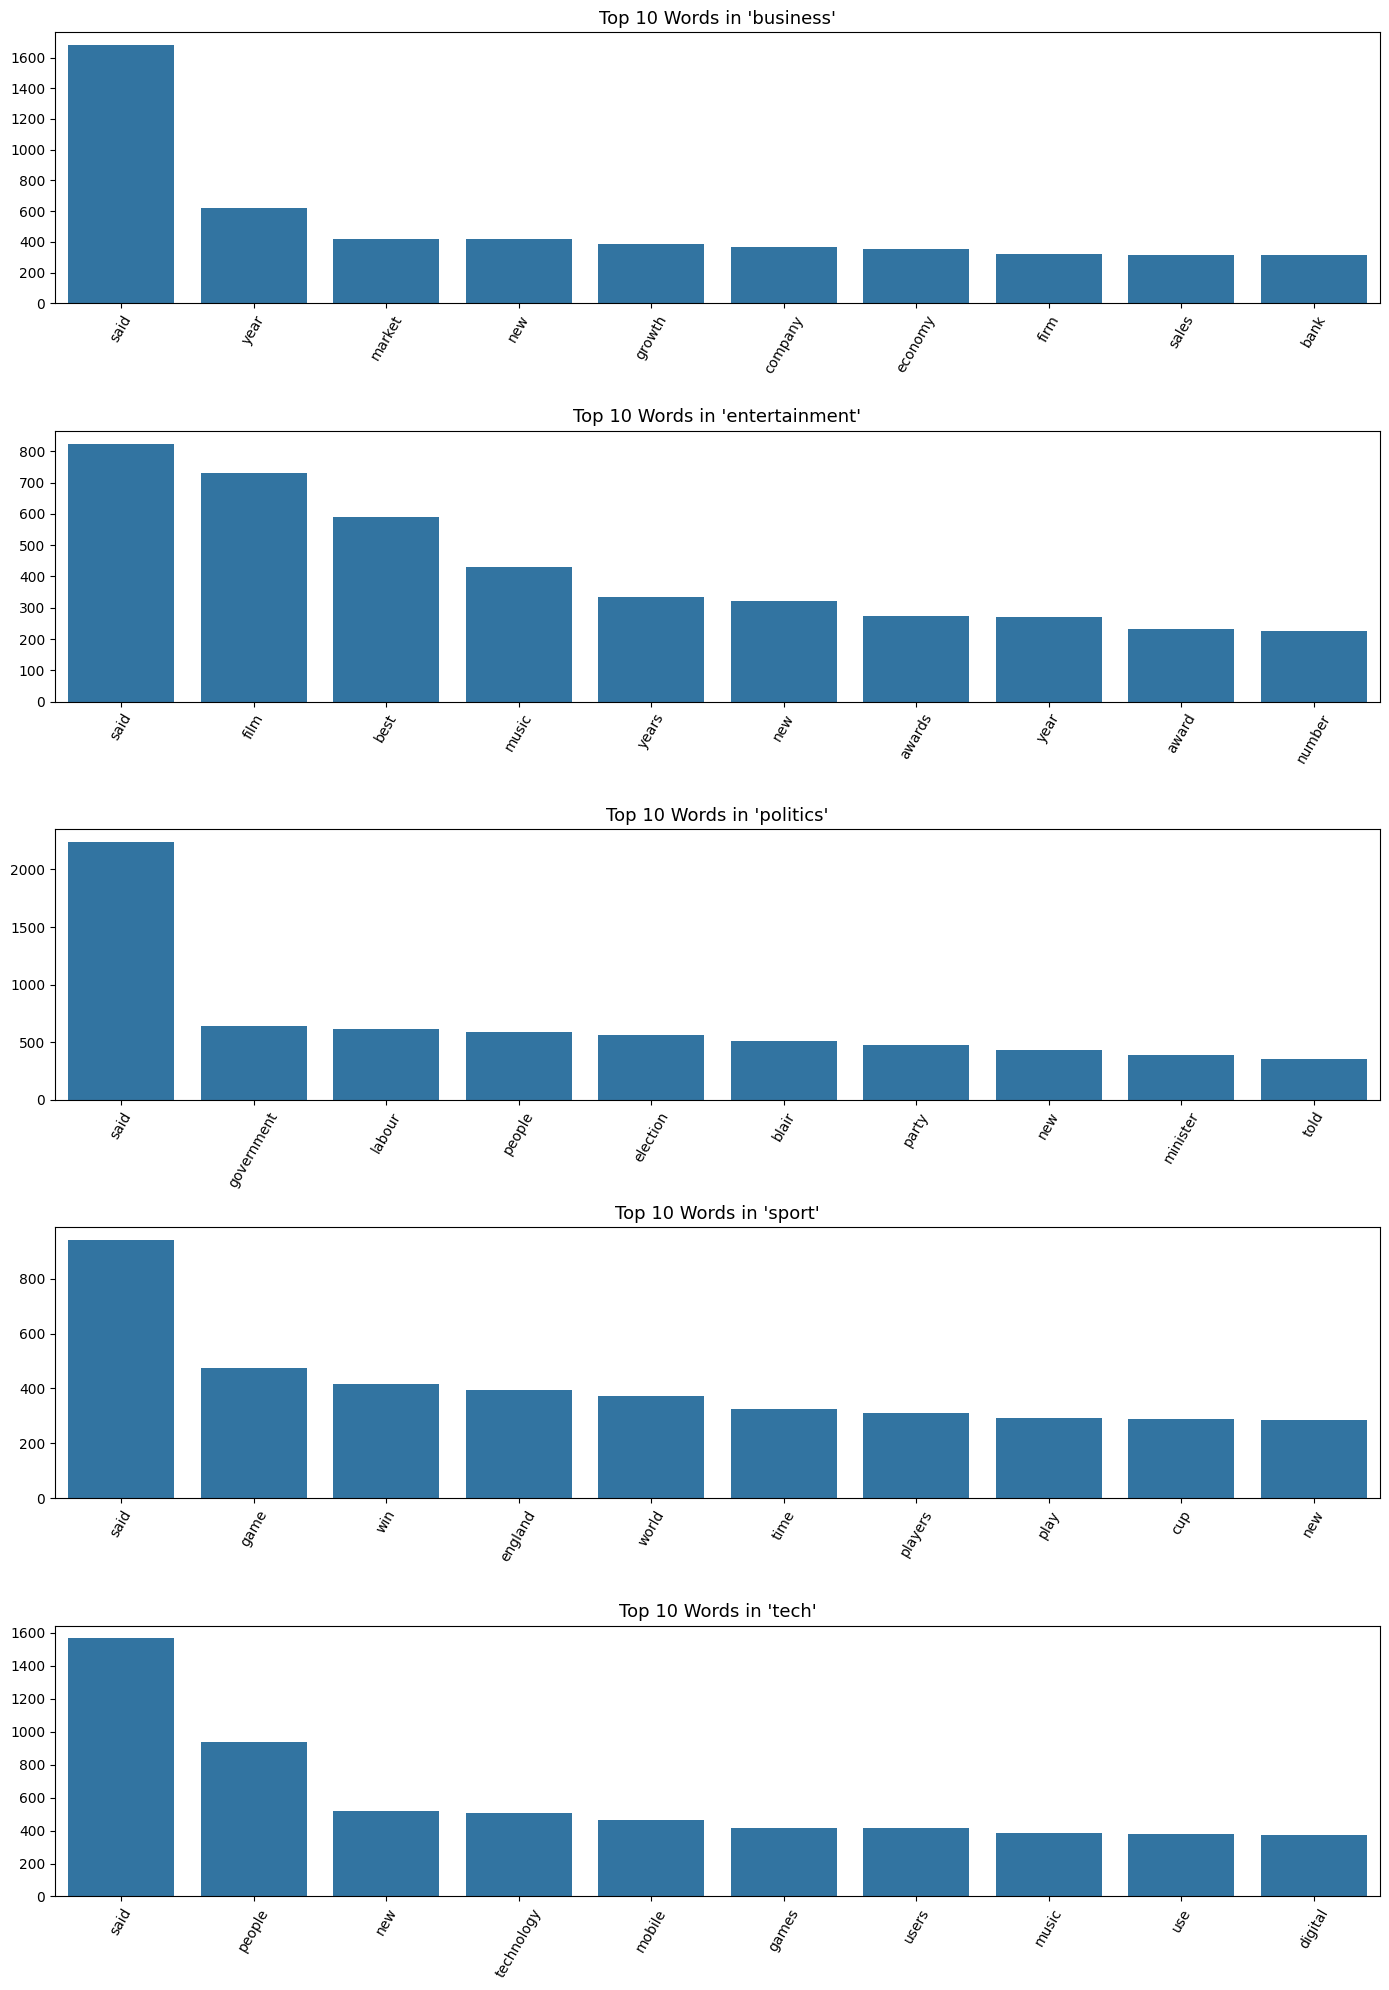

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_words_seaborn(df, text_col='clean_text', label_col='tag', top_n=10, max_features=1500):

    labels = df[label_col].unique()
    num_labels = len(labels)

    plt.figure(figsize=(14, 4 * num_labels))

    for i, label in enumerate(labels, 1):
        sub = df[df[label_col] == label]

        cv = CountVectorizer(stop_words='english', max_features=max_features)
        X = cv.fit_transform(sub[text_col])

        if X.shape[1] == 0:
            continue

        counts = X.sum(axis=0).A1
        words = cv.get_feature_names_out()

        idx = counts.argsort()[::-1][:top_n]

        # Seaborn Barplot
        plt.subplot(num_labels, 1, i)
        sns.barplot(x=[words[j] for j in idx], y=counts[idx])
        plt.title(f"Top {top_n} Words in '{label}'", fontsize=13)
        plt.xticks(rotation=60)
        plt.tight_layout()

    plt.show()

# Run the function
plot_top_words_seaborn(df)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', max_features=4000)
Xall = cv.fit_transform(df['clean_text'])
total_counts = Xall.sum(axis=0).A1
words = cv.get_feature_names_out()
total_map = dict(zip(words, total_counts))
for lab in df['tag'].unique():
    sub = df[df['tag']==lab]
    vsub = CountVectorizer(vocabulary=words, stop_words='english')
    Xs = vsub.fit_transform(sub['clean_text'])
    sub_counts = Xs.sum(axis=0).A1
    ratios = [(words[i], (sub_counts[i]+1)/(total_map[words[i]]+1)) for i in range(len(words))]
    top = sorted(ratios, key=lambda x: x[1], reverse=True)[:10]
    print(f"\nDistinctive for {lab}:", [w for w,_ in top])


Distinctive for business: ['airbus', 'baikal', 'barclays', 'bmw', 'boeing', 'boerse', 'cairn', 'citigroup', 'corp', 'ebbers']

Distinctive for entertainment: ['actress', 'angels', 'aviator', 'ballet', 'biopic', 'blanchett', 'brit', 'dicaprio', 'drake', 'eastwood']

Distinctive for politics: ['antiterror', 'asylum', 'binge', 'blunkett', 'blunketts', 'dems', 'detainees', 'detention', 'falconer', 'goldsmith']

Distinctive for sport: ['agassi', 'anfield', 'ankle', 'antidoping', 'aragones', 'arsenals', 'athletics', 'balco', 'barkley', 'bates']

Distinctive for tech: ['antispam', 'argonaut', 'bittorrent', 'blog', 'bloggers', 'blogging', 'bluray', 'bot', 'browser', 'cabir']


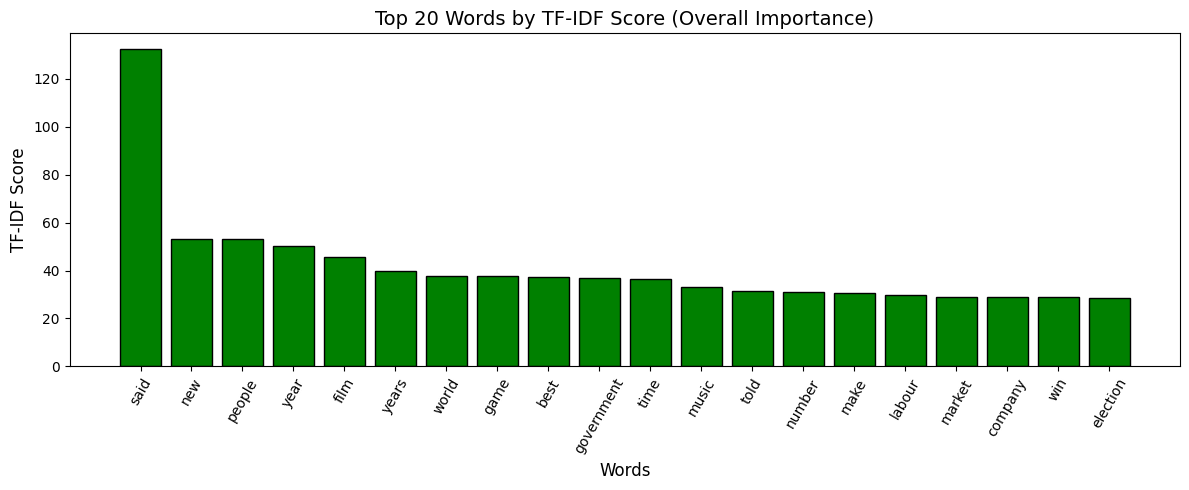

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=2000
)

# Fit and transform the cleaned text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['clean_text'])

# Compute total TF-IDF score for each word
word_scores = tfidf_matrix.sum(axis=0).A1
vocabulary = tfidf_vectorizer.get_feature_names_out()

# Get indices of top 20 words
top_n = 20
top_indices = np.argsort(word_scores)[::-1][:top_n]
top_words = [vocabulary[i] for i in top_indices]
top_scores = word_scores[top_indices]

# Plot
plt.figure(figsize=(12, 5))
plt.bar(top_words, top_scores, color='green', edgecolor='black')
plt.xticks(rotation=60)
plt.title("Top 20 Words by TF-IDF Score (Overall Importance)", fontsize=14)
plt.ylabel("TF-IDF Score", fontsize=12)
plt.xlabel("Words", fontsize=12)
plt.tight_layout()
plt.show()
plt.close()


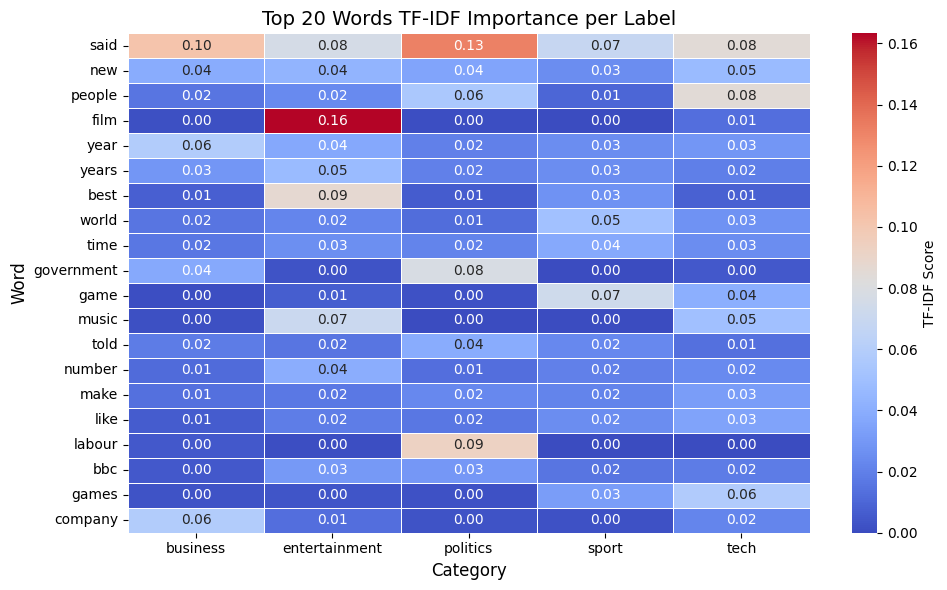

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=500
)

# Transform cleaned text
X = tfidf_vectorizer.fit_transform(df['clean_text'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert to DataFrame
df_tf = pd.DataFrame(X.toarray(), columns=feature_names)
df_tf['tag'] = df['tag']

# Compute mean TF-IDF per label
pivot = df_tf.groupby('tag').mean().T

# Select top 20 words based on average TF-IDF across labels
top_words = pivot.mean(axis=1).sort_values(ascending=False).head(20).index

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    pivot.loc[top_words],
    cmap="coolwarm",   # Updated color palette
    annot=True,        # Show TF-IDF values in the heatmap
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'TF-IDF Score'}
)

plt.title("Top 20 Words TF-IDF Importance per Label", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Word", fontsize=12)
plt.tight_layout()
plt.show()
plt.close()


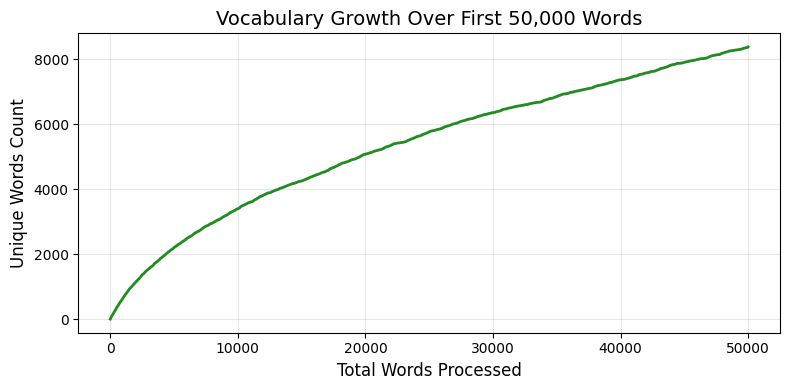

In [ ]:
# Flatten all cleaned text into a single list of words
all_words = " ".join(df['clean_text']).split()

# Track unique words over the first 50,000 words
unique_words_set = set()
unique_counts = []

for word in all_words[:50000]:
    unique_words_set.add(word)
    unique_counts.append(len(unique_words_set))

# Plot vocabulary growth
plt.figure(figsize=(8, 4))
plt.plot(unique_counts, color='forestgreen', linewidth=2)
plt.title("Vocabulary Growth Over First 50,000 Words", fontsize=14)
plt.xlabel("Total Words Processed", fontsize=12)
plt.ylabel("Unique Words Count", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()


In [ ]:
# Safely convert to int, replacing errors with 0
df['text_length'] = pd.to_numeric(df['text_length'], errors='coerce').fillna(0).astype(int)


Hypothesis testing is a statistical method used to make decisions or inferences about a population based on sample data.

It allows us to check if an observed pattern or difference in the data is real or just due to random chance.
Null Hypothesis (H₀): Average word count is the same for all categories.

Alternative Hypothesis (H₁): At least one category has a different average word count.

Using ANOVA, we test this hypothesis. If the p-value is low, we reject H₀, proving that category affects article length.

In [ ]:
from scipy.stats import f_oneway
groups = []
for lab in df['tag'].unique():
    groups.append(df[df['tag'] == lab]['text_length'])


stat, p = f_oneway(*groups)

print("ANOVA F-statistic:", stat)
print("p-value:", p)

ANOVA F-statistic: 64.0747591661012
p-value: 2.479727211013254e-51


In [ ]:
#CHI SQUARE TEST
from scipy.stats import chisquare
category_counts = df['tag'].value_counts()
stat, p = chisquare(category_counts)
print("Chi-square Statistic:", stat)
print("p-value:", p)

Chi-square Statistic: 33.21797752808989
p-value: 1.0778100928900769e-06


In [ ]:
# ML Model - 1 Implementation (Logistic Regression)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming X is your vectorized features and df['tag'] is your target variable
y = df['tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model1 = LogisticRegression(class_weight='balanced', max_iter=300)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred[:10]

array(['business', 'business', 'entertainment', 'business', 'business',
       'sport', 'politics', 'politics', 'sport', 'politics'], dtype=object)

Accuracy:  0.9573
Precision: 0.9579
Recall:    0.9573
F1 Score:  0.9571

Classification Report:

               precision    recall  f1-score   support

     business       0.94      0.98      0.96       102
entertainment       0.99      0.95      0.97        77
     politics       0.95      0.92      0.93        84
        sport       0.94      1.00      0.97       102
         tech       0.97      0.93      0.95        80

     accuracy                           0.96       445
    macro avg       0.96      0.95      0.96       445
 weighted avg       0.96      0.96      0.96       445



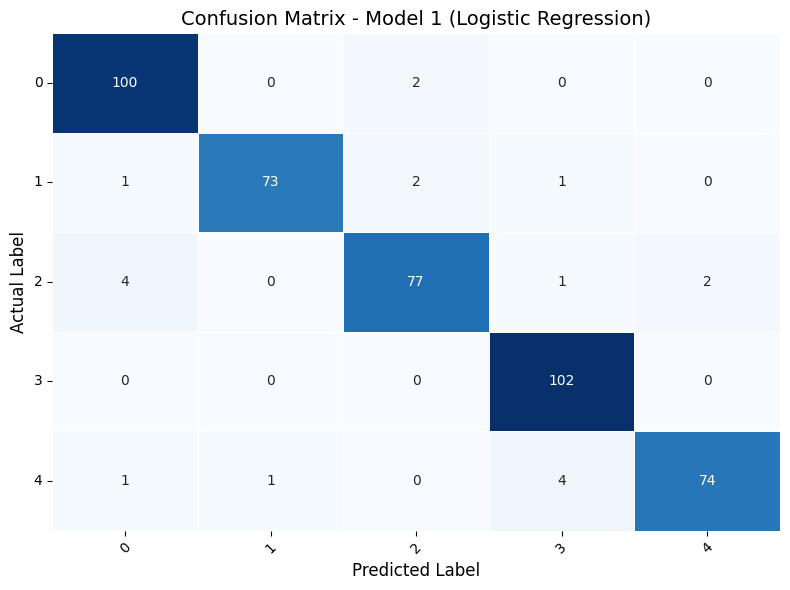

In [ ]:
# -------------------------------
# Model Evaluation Metrics & Confusion Matrix
# -------------------------------

from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Compute Evaluation Metrics
# -------------------------------
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, average='weighted'
)

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# -------------------------------
# 2. Confusion Matrix Visualization
# -------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    linewidths=0.5,
    cbar=False
)
plt.title("Confusion Matrix - Model 1 (Logistic Regression)", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Model 2 - Multinomial Naive Bayes Model**
**Performance Evaluation using evaluation metric score chart**

In [ ]:
# -------------------------------
# Model 2: Multinomial Naive Bayes
# -------------------------------

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report
)

# Initialize the model (works well with TF-IDF features)
model2 = MultinomialNB()

# Train the model
model2.fit(X_train, y_train)

# Make predictions
y2_pred = model2.predict(X_test)

# -------------------------------
# Compute Evaluation Metrics
# -------------------------------
accuracy2 = accuracy_score(y_test, y2_pred)
precision2, recall2, f1_2, _ = precision_recall_fscore_support(
    y_test, y2_pred, average='weighted'
)

# Print metrics
print("Model 2 (MultinomialNB) Performance:\n")
print(f"Accuracy : {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall   : {recall2:.4f}")
print(f"F1 Score : {f1_2:.4f}\n")

print("Classification Report:\n")
print(classification_report(y_test, y2_pred))


Model 2 (MultinomialNB) Performance:

Accuracy : 0.9438
Precision: 0.9444
Recall   : 0.9438
F1 Score : 0.9434

Classification Report:

               precision    recall  f1-score   support

     business       0.92      0.98      0.95       102
entertainment       0.94      0.95      0.94        77
     politics       0.96      0.88      0.92        84
        sport       0.96      0.99      0.98       102
         tech       0.95      0.90      0.92        80

     accuracy                           0.94       445
    macro avg       0.94      0.94      0.94       445
 weighted avg       0.94      0.94      0.94       445



10. Conclusion

The final prediction model selected is Linear SVM.

Justification for selecting Linear SVM:

Achieved the highest F1-score consistently compared to other models tested, including Logistic Regression and Multinomial Naive Bayes.

Well-suited for high-dimensional, sparse TF-IDF features, which are common in text data.

Demonstrates greater robustness to noisy, real-world text compared to Naive Bayes.

Effectively manages multi-class classification by creating strong decision boundaries.

Less likely to overfit than Logistic Regression, ensuring better generalization on unseen data.

Stakeholder Benefits

Content Strategy: Gain insights into trending topics such as climate change, AI, or geopolitics, enabling better allocation of reporting and editorial resources.

Audience Engagement: Customize content to align with reader interests by monitoring the prevalence and evolution of topics over time.

Bias & Coverage Assessment: Identify overrepresented or underrepresented themes to support more balanced and comprehensive reporting.